## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time
from urllib.request import Request

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [4]:
# 주소를 약간 수정함
# tmp1 = 'https://search.naver.com/search.naver?where=kin'
# html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'
# html = 'https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=1&nso=&post_blogurl=&post_blogurl_without=&query={key_word}&sm=tab_pge&srchby=all&st=sim&where=post&start={num}'
# https:'//search.naver.com/search.naver?where=article&ie=utf8&query={key_word}&prdtype=0&t=0&st=rel&date_option=0&date_from=&date_to=&srchby=text&dup_remove=1&cafe_url=&without_cafe_url=&board=&sm=tab_pge&start={num}'
html = 'https://search.naver.com/search.naver?where=article&sm=tab_jum&query={key_word}&start={num}'
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('한식')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('div')

In [5]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:]

['',
 ' 메뉴 영역으로 바로가기 본문 영역으로 바로가기 ',
 '    NAVER   검색                     한글 입력기     function nx_ime_load_fail () { alert("네트워크 상태가 안 좋아 한영입력기를 불러오지 못했습니다.\\n잠시 후 다시 시도해 주세요."); } function nx_ime_load (elBtn) { if (window.nx_kbd_toggle) { nx_kbd_toggle(elBtn); return; } new $Ajax("https://ssl.pstatic.net/sstatic/au/pc/ime/ime.contents_170920.js", { type : "jsonp", timeout : 3, callbackid : "$get_ime", onload : function (res) { var oData = res.json(); if (oData) { var elStyle = $("_nx_kbd_style"); oData.ime_css += "#_nx_kbd .setkorhelp a { display:none; }" ; if (elStyle.styleSheet) { elStyle.styleSheet.cssText = oData.ime_css; } else { elStyle.innerHTML = oData.ime_css; } $("_nx_kbd").innerHTML = oData.ime_html; nx_js_lazyload("https://ssl.pstatic.net/sstatic/au/s/pc/_common/ime/nhn.ime_search_140825.js", function () { nx_kbd_toggle(elBtn); }); } else { nx_ime_load_fail(); } }, ontimeout : nx_ime_load_fail, onerror : nx_ime_load_fail }).request(); }   자동완성 펼치기  검색               시간대와 관심사

In [6]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,100,10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('한식 메뉴')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(1)    
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [82]:
len(present_candi_text)

130

In [7]:
# 만개의 글을 하나의 변수에 저장
import nltk
from konlpy.tag import Okt

okt = Okt()

present_text = ''
for each_line in present_candi_text[:100]:
    present_text = present_text + each_line + "\n"
    
    

In [8]:
# 형태소 분석
tokens_ko = okt.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '한식',
 '메뉴',
 '배달',
 '하시는',
 '사장',
 '님',
 '계신가요',
 '?',
 '2020.07',
 '.',
 '04',
 '.',
 '비빔밥',
 ',',
 '찌개',
 ',',
 '안주',
 '류',
 '배달',
 '메뉴',
 '로',
 '하고있는데',
 '어제',
 '배달',
 '과정',
 '에서',
 '포장',
 '이',
 '벗겨져서',
 '국물',
 '이',
 '많이',
 '흘러서',
 '...',
 '포장',
 '뚜껑',
 '덥고',
 '랩',
 '으로',
 '한번',
 '씌워',
 '야할지',
 '..',
 '고민',
 '입니다',
 '다른',
 '사',
 '장님',
 '들',
 '은',
 '국물',
 '메뉴',
 '팩킹',
 '어떻게',
 '하시나요',
 '?',
 '아프니까',
 '사장',
 '이다',
 '[',
 '소상',
 '공인',
 '·',
 '자영',
 '업자',
 '·',
 '창',
 '...',
 'cafe.naver.com/jihosoccer',
 '...',
 '카페',
 '내',
 '검색',
 '대구',
 '한식',
 '메뉴',
 '??',
 '2020.07',
 '.

In [9]:
ko = nltk.Text(tokens_ko, name='한식 메뉴')
print(len(ko.tokens))
print(len(set(ko.tokens))) # 중복 제거

5159
1443


In [10]:
# 그중에서 많이 사용되는 단어 100개
ko.vocab().most_common(100)


[('.', 224),
 ('한식', 196),
 ('...', 155),
 ('메뉴', 151),
 ('카페', 115),
 ('검색', 109),
 ('내', 83),
 ('조리', 69),
 ('의', 62),
 (',', 53),
 ('를', 49),
 ('?', 45),
 ('가', 44),
 ('이', 43),
 ('단어', 40),
 ('는', 34),
 ('<', 34),
 ('모', 33),
 ('>', 33),
 ('기능사', 32),
 ('자격증', 32),
 ('것', 32),
 ('시험', 32),
 ('모든', 31),
 ('cafe.naver.com/koreancook', 30),
 ('하는', 29),
 ('대', 29),
 ('에', 29),
 ('을', 29),
 ('들', 28),
 ('맛집', 28),
 ('추천', 26),
 ('오늘', 25),
 ('입력', 24),
 ('(', 23),
 ('요', 22),
 ('뭐', 21),
 ('한', 20),
 ('때', 20),
 ('~', 20),
 ('도', 20),
 ('은', 19),
 ('로', 17),
 ('에서', 17),
 ('포함', 16),
 ('뷔페', 16),
 ('1', 16),
 ('실기', 15),
 ('2020.07', 14),
 ('..', 14),
 ('연관검색어', 14),
 (')', 14),
 ('/', 13),
 ('해서', 13),
 ('[', 13),
 ('수', 13),
 ('맘', 13),
 ('!', 13),
 ('과', 13),
 ('배달', 12),
 ('으로', 11),
 ('교시', 11),
 ('된', 10),
 ('기', 10),
 ('할', 10),
 ('합니다', 10),
 ('·', 10),
 ('있을까요', 10),
 ('다시', 10),
 ('요리', 10),
 ('곳', 10),
 ('제', 10),
 ('부산', 10),
 ('고', 10),
 ('하나', 9),
 ('이상', 9),
 ('제외', 9),


In [11]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','블로그','입력','검색']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='한식 메뉴')
ko.vocab().most_common(20)

[('한식', 196),
 ('메뉴', 151),
 ('카페', 115),
 ('내', 83),
 ('조리', 69),
 ('<', 34),
 ('모', 33),
 ('>', 33),
 ('기능사', 32),
 ('자격증', 32),
 ('시험', 32),
 ('모든', 31),
 ('cafe.naver.com/koreancook', 30),
 ('맛집', 28),
 ('추천', 26),
 ('오늘', 25),
 ('(', 23),
 ('에서', 17),
 ('포함', 16),
 ('뷔페', 16)]

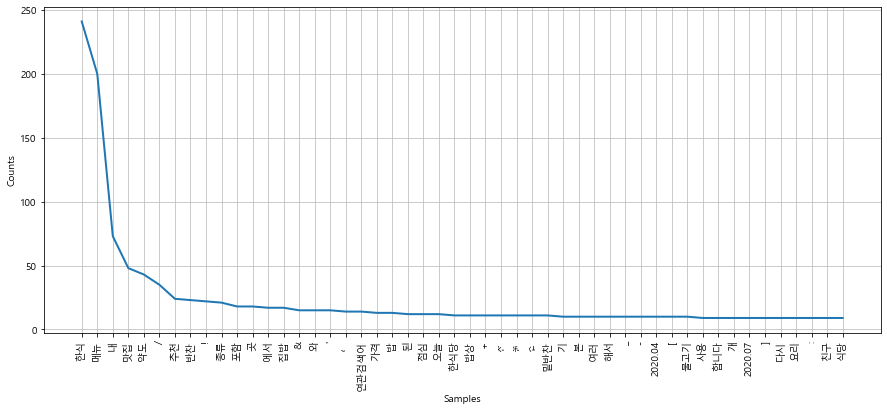

In [88]:
plt.figure(figsize=(15,6))
ko.plot(50)

In [14]:
!pip install wordcloud

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
""" 워드 크라우드 그리기 """

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:\Windows\Fonts\malgun.ttf',relative_scaling=0.2,background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')

ImportError: cannot import name 'WordCloud' from 'wordcloud' (D:\KYE\Python\fML기초\이미지 통신\wordcloud.py)

In [13]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('./img/heart_image.jpg'))
image_colors = ImageColorGenerator(mask)

data = ko.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:\Windows\Fonts\malgun.ttf',relative_scaling=0.2,mask=mask,background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')

ImportError: cannot import name 'ImageColorGenerator' from 'wordcloud' (D:\KYE\Python\fML기초\이미지 통신\wordcloud.py)